In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics,preprocessing
from sklearn.cross_validation import train_test_split

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("input/train_v2.csv")
test_data = pd.read_csv("input/test_v2.csv")

## data exploration

In [3]:
train_data.describe()

,article_id,timestamp,category
count,6027.000000,6.027000e+03,6027.000000
mean,3014.000000,1.395019e+12,2.657043
std,1739.989368,5.000378e+09,1.428464
min,1.000000,1.390000e+12,0.000000
25%,1507.500000,1.390000e+12,2.000000
50%,3014.000000,1.400000e+12,3.000000
75%,4520.500000,1.400000e+12,4.000000
max,6027.000000,1.400000e+12,4.000000


In [4]:
train_data.head()

,article_id,title,url,publisher,hostname,timestamp,category
0,1,Forex - Pound drops to one-month lows against ...,http://www.nasdaq.com/article/forex-pound-drop...,NASDAQ,www.nasdaq.com,1.390000e+12,4
1,2,Hertz to Exit Equipment Rental Business in $2....,http://www.foxbusiness.com/industries/2014/03/...,Fox Business,www.foxbusiness.com,1.400000e+12,2
2,3,Gold ETF inflows return,http://www.resourceinvestor.com/2014/03/09/gol...,Resource Investor,www.resourceinvestor.com,1.390000e+12,4
3,4,"Hackers call Mt. Gox CEO a liar, say he still ...",http://bgr.com/2014/03/10/mt-gox-fraud-accusat...,BGR,bgr.com,1.390000e+12,4
4,5,Gold Climbs To Near 6-Month High On Concerns A...,http://www.forbes.com/sites/kitconews/2014/03/...,Forbes,www.forbes.com,1.390000e+12,4


In [5]:
test_data.head()

,article_id,title,url,publisher,hostname,timestamp
0,1,White House plays down speedy role for US natu...,http://www.thestar.com.my/News/World/2014/03/0...,The Star Online,www.thestar.com.my,1.390000e+12
1,2,Asian Stocks Broadly Higher After Selloff,http://www.nasdaq.com/article/asian-stocks-bro...,NASDAQ,www.nasdaq.com,1.390000e+12
2,3,Herbalife Ltd. (HLF) Probe Earns Bill Ackman B...,http://www.valuewalk.com/2014/03/herbalife-ltd...,ValueWalk,www.valuewalk.com,1.390000e+12
3,4,BOE to Get Fourth Deputy Governor as Carney Fi...,http://www.businessweek.com/news/2014-03-11/bo...,Businessweek,www.businessweek.com,1.390000e+12
4,5,Pilots get scrutiny,http://www.dispatch.com/content/stories/nation...,Columbus Dispatch,www.dispatch.com,1.400000e+12


In [7]:
print(len(train_data['hostname']))
print(len(train_data['hostname'].unique()))

6027
1488


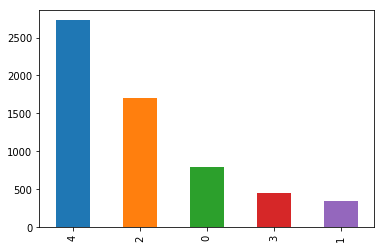

In [71]:
train_data.category.value_counts().plot(kind='bar')

In [18]:
train_data.hostname.value_counts()#.plot(kind='bar')
#plt.show()

in.reuters.com                  87
www.sfgate.com                  68
www.nasdaq.com                  68
www.businessweek.com            66
www.globalpost.com              46
www.reuters.com                 46
www.bloomberg.com               44
www.bizjournals.com             41
www.rttnews.com                 39
www.marketwatch.com             35
blogs.wsj.com                   33
www.forbes.com                  32
www.investing.com               28
online.wsj.com                  28
www.cnbc.com                    27
www.foxbusiness.com             26
www.washingtonpost.com          25
www.bbc.co.uk                   25
www.lse.co.uk                   24
www.fool.com                    24
www.euronews.com                24
www.valuewalk.com               24
www.ibtimes.co.uk               23
seekingalpha.com                23
www.business-standard.com       23
economictimes.indiatimes.com    23
www.wdrb.com                    22
www.newser.com                  21
www.theglobeandmail.

In [ ]:
le_hostname = preprocessing.LabelEncoder() #transform a~z to 0~25
le_hostname.fit(train_data['hostname'])

In [ ]:
train_data['hostname_en'] = le_hostname.transform(train_data['hostname'])

In [37]:
X=train_data['title']
y=train_data['category']
X_test=test_data['title']


In [84]:
X

0       Forex - Pound drops to one-month lows against ...
1       Hertz to Exit Equipment Rental Business in $2....
2                                 Gold ETF inflows return
3       Hackers call Mt. Gox CEO a liar, say he still ...
4       Gold Climbs To Near 6-Month High On Concerns A...
5       JC Penney Gains as Citigroup Analyst Upgrades ...
6       The evil genius of Candy Crush's $7.6 billion ...
7       Ukraine Crisis: LNG Stocks in Focus - Analyst ...
8                  Vodafone Agrees to Acquire Spain's Ono
9       Silicon Valley billionaire's life insured for ...
10             Marijuana yields $2m in taxes for Colorado
11      Mercedes-Benz mulls three-cylinder hybrid powe...
12      Major Averages Stage Recovery Attempt But Fini...
13      U.S. futures mixed to lower, Chinese data weig...
14      Will Antitrust Unravel the Jos. A. Bank/Men's ...
15      New York Metro-North worker struck and killed ...
16      Plane search expands from Australia to Kazakhstan
17      Norfol

# # sentence to word vector

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(X)
X_vector = count_vec.transform(X)
#count_vec.get_feature_names()
X_test_vector = count_vec.transform(X_test)

In [11]:
len(count_vec.get_feature_names())

1967

In [65]:
count_vec.get_feature_names()[:10]

['004', '009', '021', '028', '0318', '038', '041', '05', '0645', '0658']

In [70]:
count_vec.get_feature_names()[-50:]

['westhus',
 'westminster',
 'wheat',
 'wheaton',
 'wheels',
 'whimper',
 'whiskey',
 'whistling',
 'whiz',
 'wide',
 'widely',
 'widen',
 'wider',
 'william',
 'wilts',
 'winner',
 'winning',
 'wintertime',
 'wiring',
 'wisdom',
 'wisdomtree',
 'wise',
 'withheld',
 'wm',
 'wmbfnews',
 'women',
 'wonder',
 'wonkbook',
 'worked',
 'workshop',
 'worldwide',
 'worst',
 'wouldn',
 'write',
 'writedown',
 'wrongdoing',
 'wrote',
 'wsmv',
 'wti',
 'xiaojia',
 'xs',
 'yankee',
 'yanks',
 'yearly',
 'yelp',
 'yemen',
 'yield',
 'yields',
 'zacks',
 'zealand']

TODO: use en.lemma to reduce the total number of feature names by combining similar words such as write and wrote, yield and yields

In [60]:
#preperation:
#install microsoft C++ builder from https://visualstudio.microsoft.com/visual-cpp-build-tools/
#pip install --only-binary :all: mysqlclient
#pip install pattern
import pattern.en as en
base_form = en.lemma('Ate') # base_form == "eat"
print(base_form)

eat


In [61]:
from nltk.corpus import stopwords
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [en.lemma(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [62]:
text_process("He is ::having a great Time, at the park time?")

['great', 'time', 'park', 'time']

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZQS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [79]:
print(X_vector.toarray()[0:1])

[[0 0 0 ... 0 0 0]]


# do training and prediction

In [35]:
X_train, X_vali, y_train, y_vali = train_test_split(X_vector.toarray(), y, test_size= 0.2, random_state=13)

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold


In [16]:
knn = KNeighborsClassifier(n_neighbors=1,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_vali)
print(metrics.accuracy_score(y_vali, y_pred))

0.2777777777777778


In [19]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_vali.shape)
print(y_vali.shape)

(4821, 1967)
(4821,)
(1206, 1967)
(1206,)


In [56]:
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_vali = xgb.DMatrix(X_vali, label=y_vali)
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 5
watchlist = [(xg_train, 'train'), (xg_vali, 'vali')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-merror:0.549264	vali-merror:0.541459
[1]	train-merror:0.549264	vali-merror:0.541459
[2]	train-merror:0.549264	vali-merror:0.541459
[3]	train-merror:0.549264	vali-merror:0.541459
[4]	train-merror:0.549264	vali-merror:0.541459


In [57]:
pred = bst.predict(xg_vali)
error_rate = np.sum(pred != y_vali) / y_vali.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.5414593698175788


In [58]:
xg_test = xgb.DMatrix(X_test_vector)

In [59]:
y_test = bst.predict(xg_test)

In [64]:
y_test=y_test.astype(np.int32)

In [65]:
test_data['category']=y_test

In [66]:
print(y_test.dtype)

int32


In [67]:
out=pd.DataFrame(test_data,columns=['article_id','category'])
out.to_csv('prediction.csv',index=False)